###### 2025.04.03
- CIC IoMT Intrusion data 2024
- by Eui Cheol. Kim

### EDA
###### 2024.04.03
    - dataload and 

###### 2025.04.27
- CIC IoMT Intrusion data 2024

#### EDA
    - data.info
    - check data label balance
    - check outlier&missing data 
    - feature 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from config import data_setting, predict_setting
from dataFactory import Read_DataList, CIC_Dataset


In [14]:
# set data path & level 
filePath = data_setting["filePath"]
level = 1 # data_setting["level"]
scale = data_setting["scale"]
val_size = data_setting["val_size"]
pred_filePath = predict_setting["pred_filePath"]

# set train with dataset
num_workers = data_setting["num_workers"]
batch_size = data_setting["batch_size"]
drop_last = data_setting["drop_last"]
shuffle_flag = data_setting["shuffle_flag"]       
add_test = True

dataloader = Read_DataList(filePath, val_size, level, scale, add_test)


 - [ Start Read Data-List And Load Data-files ] - 

Now Loading........TCP_IP-DoS-SYN1_train.pcap.csv...Check.left/Total_file..(51/51)
Skip:..Recon-OS_Scan_train.pcap.csv..is..in...the..List..of..skip..Category..Class...(50/51)
Now Loading........TCP_IP-DDoS-UDP8_train.pcap.csv...Check.left/Total_file..(49/51)
Now Loading........TCP_IP-DoS-ICMP4_train.pcap.csv...Check.left/Total_file..(48/51)
Now Loading........TCP_IP-DDoS-SYN4_train.pcap.csv...Check.left/Total_file..(47/51)
Now Loading........TCP_IP-DDoS-ICMP1_train.pcap.csv...Check.left/Total_file..(46/51)
Now Loading........TCP_IP-DoS-TCP3_train.pcap.csv...Check.left/Total_file..(45/51)
Now Loading........MQTT-DDoS-Connect_Flood_train.pcap.csv...Check.left/Total_file..(44/51)
Skip:..Recon-VulScan_train.pcap.csv..is..in...the..List..of..skip..Category..Class...(43/51)
Now Loading........TCP_IP-DDoS-ICMP8_train.pcap.csv...Check.left/Total_file..(42/51)
Now Loading........TCP_IP-DDoS-TCP4_train.pcap.csv...Check.left/Total_file..(41/51

In [19]:
# 데이터를 읽어 들이고 데이터의 모양을 확인
train,train_label = dataloader.get_train_data()
val, val_label = dataloader.get_val_data()
test, test_label = dataloader.get_test_data()
print (f"train input shape: {train.shape} \ntrain_label shape: {train_label.shape}\n")
print (f"val input shape: {val.shape} \nval_label shape: {val_label.shape}\n")
print (f"test input shape: {test.shape} \ntest_label shape: {test_label.shape}\n \n")

oneHot = dataloader.get_oneHot()
print(f"label_oneHot_categories: {oneHot.categories_}")

colnames = dataloader.colnames
# colnames = colnames.remove('class_1')
print(f"feature column name's: {colnames}")
print(f"fueature columns length: {len(colnames)}")


train input shape: (5628742, 45) 
train_label shape: (5628742, 3)

val input shape: (1407186, 45) 
val_label shape: (1407186, 3)

test input shape: (1583015, 45) 
test_label shape: (1583015, 3)
 

label_oneHot_categories: [array(['Benign', 'DDoS', 'DoS'], dtype=object)]
feature column name's: ['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'class_1']
fueature columns length: 46


In [ ]:
# trasform to DataFrame
df_train_label = pd.DataFrame(train_label, columns=[oneHot.categories_[0]])
df_val_label = pd.DataFrame(val_label, columns=[oneHot.categories_[0]])
df_test_label = pd.DataFrame(test_label, columns=[oneHot.categories_[0]])

# label count plot
def plot_column_sums(df, flag:str):
    column_sums = df.sum()
    print(f"{flag.upper} columns count : \n{column_sums}")
    plt.figure(figsize=(10, 6))
    column_sums.plot(kind='bar')
    plt.title(f'Sum of {flag.upper()}\'s Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Sum')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc=1)
    plt.show()


In [ ]:
for i, n in enumerate(df_test_label.sum()):
    print(f"percentage of {n} : {round(df_test_label.sum()[i]/df_test_label.shape[0],3)}")

In [ ]:
plot_column_sums(df_train_label, "train")
plot_column_sums(df_val_label, "val")
plot_column_sums(df_test_label, "test")

In [ ]:
len(colnames)
colnames.remove('class_1')
colnames

In [ ]:
# train transform to dataframe
train_label_re = oneHot.inverse_transform(train_label)
train_label_re.shape # 1407186, 1
train.shape # (1407186, 45)
df_train = pd.DataFrame(train, columns=colnames)
df_train["class"] = train_label_re[:,0]
df_train.head()

In [ ]:
# val transform to dataframe
val_label_re = oneHot.inverse_transform(val_label)
val_label_re.shape # 1407186, 1
val.shape # (1407186, 45)
df_val = pd.DataFrame(val, columns=colnames)
df_val["class"] = val_label_re[:,0]
df_val.head()


In [ ]:
# test transform to dataframe
test_label_re = oneHot.inverse_transform(test_label)
test_label_re.shape # 1407186, 1
test.shape # (1407186, 45)
df_test = pd.DataFrame(test, columns=colnames)
df_test["class"] = test_label_re[:,0]
df_test.head()

In [ ]:

def plot_distribution_by_category(df, category_col, distribution_col):
    categories = df[category_col].unique()
    for category in categories:
        subset = df[df[category_col] == category]
        plt.figure()
        sns.histplot(subset[distribution_col], kde=True)
        plt.title(f"Distribution of {distribution_col} for {category_col} = {category}")
        plt.xlabel(distribution_col)
        plt.ylabel("Frequency")
        plt.show()

def plot_distribution_by_category_box(df, category_col, distribution_col):
    plt.figure()
    sns.boxplot(x=category_col, y=distribution_col, data=df)
    plt.title(f"Distribution of {distribution_col} by {category_col}")
    plt.xlabel(category_col)
    plt.ylabel(distribution_col)
    plt.show()


#### Feature :  Header_Length

##### df_train

In [ ]:
df_train.describe()

In [ ]:
plot_distribution_by_category(df_train, 'class', 'Header_Length')

##### df_val

In [ ]:
df_val.describe()

In [ ]:
plot_distribution_by_category(df_val, 'class', 'Header_Length')


In [ ]:
plot_distribution_by_category_box(df_val, 'class', 'Header_Length')

##### data balancing  

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
# train_smt, train_label_smt = smt.fit_resample(train, train_label)
val_smt, val_label_smt = smt.fit_resample(val, val_label)


In [ ]:
df_val_label_smt = pd.DataFrame(val_label_smt, columns=[oneHot.categories_[0]])
df_val_smt = pd.DataFrame(val_smt, columns=[oneHot.categories_[0]])

In [ ]:

plot_column_sums(df_val_label_smt, "val")

In [ ]:
plot_distribution_by_category_box(df_val_smt, 'class', 'Header_Length')

In [ ]:
df_val_label_smt.to_csv('./df_val_label_smt.csv')

##### simple upsampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
# train_smt, train_label_smt = smt.fit_resample(train, train_label)
train_ros, train_label_ros = ros.fit_resample(train, train_label)

In [ ]:
df_train_label_ros = pd.DataFrame(train_label_ros, columns=[oneHot.categories_[0]])
train_label_ros_re = oneHot.inverse_transform(train_label_ros)
df_train_ros = pd.DataFrame(train_ros, columns=colnames)
df_train_ros["class"] = train_label_ros_re[:,0]
df_train_ros.head()

In [ ]:
plot_column_sums(df_train_label_ros, "train")

In [ ]:
plot_distribution_by_category_box(df_train_ros, 'class', 'Header_Length')

In [ ]:
plot_distribution_by_category(df_train_ros, 'class', 'Header_Length')

In [ ]:
# memory overflow
# plot_distribution_by_category(df_train_ros, 'class', 'Rate')

### Down Resampling

In [ ]:
# oneHot.categories_[0]
df_val.columns[:-1]

In [ ]:
from imblearn.under_sampling import TomekLinks

# 근접 데이터만 제거

tlk = TomekLinks(sampling_strategy='auto')
val_tlk, val_label_tlk = tlk.fit_resample(val, val_label)

df_val_label_tlk = pd.DataFrame(val_label_tlk, columns=[oneHot.categories_[0]])
df_val_tlk = pd.DataFrame(val_tlk, columns=[df_val.columns[:-1]])

plot_column_sums(df_val_label_tlk, "val")

df_val_tlk.to_csv('./data/CIC_2024/balanced/df_val_tlk.csv')
df_val_label_tlk.to_csv('./data/CIC_2024/balanced/df_val_label_tlk.csv')

In [ ]:
# from imblearn.under_sampling import CondensedNearestNeighbour

# undersample = CondensedNearestNeighbour(n_neighbors = 1)
# X, y = undersample.fit_sample(X, y)

from imblearn.under_sampling import OneSidedSelection

oss = OneSidedSelection(n_neighbors = 1, n_seeds_S = 1,sampling_strategy='majority', random_state = 21)
val_oss, val_label_oss = oss.fit_resample(val, val_label)


df_val_label_oss = pd.DataFrame(val_label_oss, columns=[oneHot.categories_[0]])
df_val_oss = pd.DataFrame(val_oss, columns=[df_val.columns[:-1]])

plot_column_sums(df_val_label_oss, "val")

df_val_oss.to_csv('./data/CIC_2024/balanced/df_val_oss.csv')
df_val_label_oss.to_csv('./data/CIC_2024/balanced/df_val_label_oss.csv')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state = 21)
val_rus, val_label_rus = rus.fit_resample(val, val_label)


df_val_label_rus = pd.DataFrame(val_label_rus, columns=[oneHot.categories_[0]])
df_val_rus = pd.DataFrame(val_rus, columns=[df_val.columns[:-1]])

plot_column_sums(df_val_label_rus, "val")

df_val_rus.to_csv('./data/CIC_2024/balanced/df_val_rus.csv')
df_val_label_rus.to_csv('./data/CIC_2024/balanced/df_val_label_rus.csv')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state = 21)
train_rus, train_label_rus = rus.fit_resample(train, train_label)


df_train_label_rus = pd.DataFrame(train_label_rus, columns=[oneHot.categories_[0]])
df_train_rus = pd.DataFrame(train_rus, columns=[df_train.columns[:-1]])

plot_column_sums(df_train_label_rus, "train")

df_train_rus.to_csv('./data/CIC_2024/balanced/df_train_rus.csv')
df_train_label_rus.to_csv('./data/CIC_2024/balanced/df_train_label_rus.csv')

In [ ]:
test_rus, test_label_rus = rus.fit_resample(test, test_label)


df_test_label_rus = pd.DataFrame(test_label_rus, columns=[oneHot.categories_[0]])
df_test_rus = pd.DataFrame(test_rus, columns=[df_test.columns[:-1]])

plot_column_sums(df_test_label_rus, "test")

df_test_rus.to_csv('./data/CIC_2024/balanced/df_test_rus.csv')
df_test_label_rus.to_csv('./data/CIC_2024/balanced/df_test_label_rus.csv')

#### Dimention Reduction

In [5]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [20]:

train = './data/CIC_2024/balanced/df_train_rus.csv'
train_label = './data/CIC_2024/balanced/df_train_label_rus.csv'

# df_val = './data/CIC_2024/balanced/df_val_rus.csv'
# df_test = './data/CIC_2024/balanced/df_test_rus.csv'

df_train = pd.read_csv(train).iloc[:,1:]

scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_train_scaled.shape

(462552, 45)

In [21]:
df_train.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.657770,-0.325049,-0.099514,-0.389798,-0.389798,0.0,-0.149552,-0.462332,-0.282124,4.974796,...,0.214643,0.193904,0.213661,6.022331,6.017068,0.681844,0.193817,-0.112087,4.070029,6.025722
1,1.772717,-0.325049,0.736546,-0.389789,-0.389789,0.0,-0.149552,-0.462332,-0.282124,4.974796,...,0.508572,1.335867,0.214928,6.022390,6.017068,1.295029,1.340038,0.033380,4.070029,6.025722
2,0.561678,-0.325049,6.815695,-0.389784,-0.389784,0.0,-0.149552,-0.462332,-0.282124,4.974796,...,0.329817,0.632800,0.490983,6.022239,6.017068,0.934128,0.635474,-0.067994,4.070029,6.025722
3,6.485843,1.411895,-0.439607,-0.374073,-0.374073,0.0,-0.149552,-0.462332,-0.282124,-0.228307,...,4.218271,9.578611,9.446323,-6.015280,-6.014116,5.274774,9.582676,10.726848,2.287511,-6.022891
4,26.899088,-0.325049,-0.099514,-0.387523,-0.387523,0.0,-0.149552,-0.462332,-0.282124,-0.228307,...,18.103214,-0.159117,18.168662,-6.015280,-6.014116,15.383418,-0.158976,-0.120588,-0.386267,-6.022891


In [31]:
df_train_label = pd.read_csv(train_label).iloc[:,1:]
df_train_label.head()
df_train_rvs = oneHot.inverse_transform(df_train_label)
df_train_rvs = pd.DataFrame(df_train_rvs, columns=['class'])
df_train_rvs['class'] = df_train_rvs['class'].astype('category')

In [ ]:
n_components = 2
perplexity = 30.
n_iter = 300
tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter, random_state=42)
train_embedded = tsne.fit_transform(df_train_scaled)

In [ ]:
if n_components == 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(train_embedded[:, 0], train_embedded[:, 1], c=df_train_rvs['class'].cat.codes, cmap='Spectral')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE visualization of digits dataset (perplexity={perplexity}, n_iter={n_iter})')
    plt.colorbar(scatter, label='Digit')
    plt.grid(True)
    plt.show()

In [ ]:
n_components_3d = 3
tsne_3d = TSNE(n_components=n_components_3d, perplexity=perplexity, n_iter=n_iter, random_state=42)
train_embedded = tsne_3d.fit_transform(df_train_scaled)


t-SNE 3차원 임베딩 후 데이터 형태: (462552, 3)


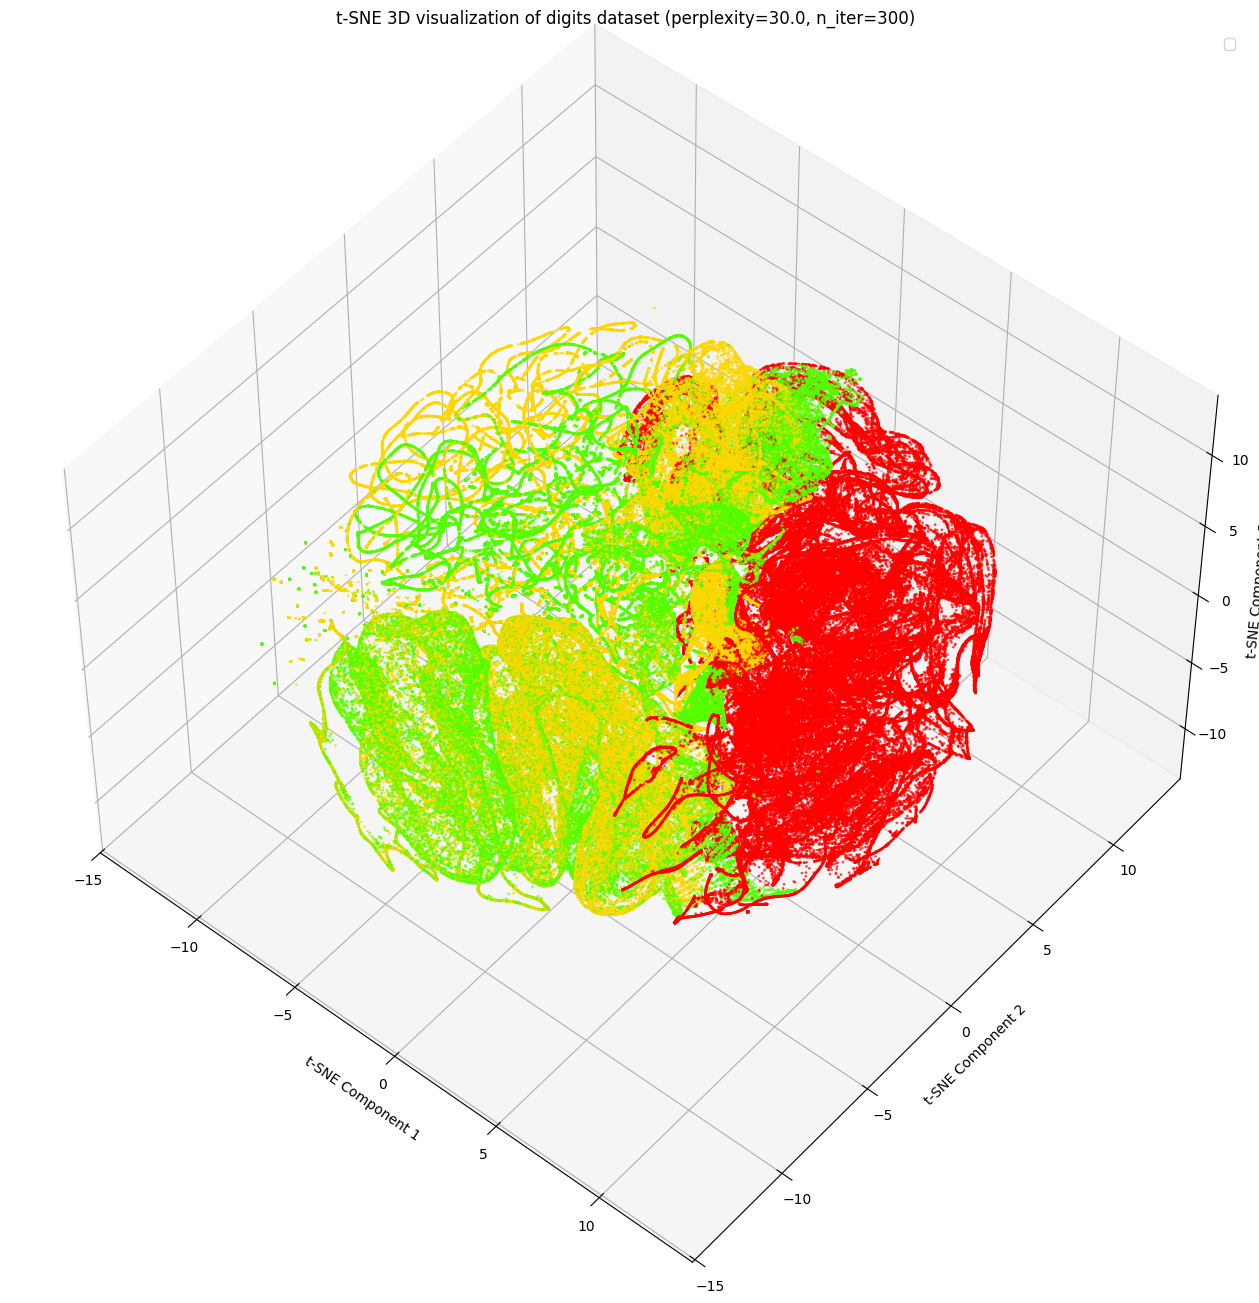

In [42]:

print("\nt-SNE 3차원 임베딩 후 데이터 형태:", train_embedded.shape)

# 5. t-SNE 결과 시각화 (3차원으로 임베딩했을 경우)
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_embedded[:, 0], train_embedded[:, 1], train_embedded[:, 2], c=df_train_rvs['class'].cat.codes, cmap='prism', s=1, alpha=0.6)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title(f't-SNE 3D visualization of digits dataset (perplexity={perplexity}, n_iter={n_iter})')
# fig.colorbar(scatter, label='Digit')
ax.view_init(elev=50, azim=-50, roll=0)
ax.legend()
plt.show()
